In [4]:

#IMPORT THE LIBRARIES
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
import IPython.display as ipd
from IPython.display import Audio
import keras


In [5]:
Emotions = pd.read_csv('./emotion.csv')
Emotions.head()

,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,Emotions
0,0.173828,0.264648,0.372559,0.486328,0.625488,0.681152,0.720703,0.651855,0.562988,0.559082,...,0.766315,0.755441,0.743671,0.731043,0.717561,0.703260,0.688124,0.672208,0.655518,neutral
1,0.247559,0.372559,0.505371,0.513672,0.512207,0.504395,0.490723,0.474609,0.479492,0.477051,...,0.826274,-3.222172,1.388915,4.013056,2.990819,2.015841,0.986858,-1.120504,-0.159986,neutral
2,0.256348,0.354492,0.471191,0.414062,0.378418,0.373535,0.354492,0.408691,0.466797,0.522461,...,0.006713,0.006601,0.006483,0.006356,0.006218,0.006066,0.005919,0.005759,0.005588,neutral
3,0.255859,0.387695,0.515625,0.509766,0.517578,0.515137,0.520996,0.518555,0.506836,0.500977,...,2.064635,0.224009,1.975531,-0.864343,-1.678869,-3.831218,-0.846629,-0.629172,3.793445,neutral
4,0.247070,0.389648,0.564941,0.642578,0.665527,0.684570,0.676270,0.666992,0.648926,0.595703,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,neutral


In [6]:
Emotions=Emotions.fillna(0)
print(Emotions.isna().any())
Emotions.shape
np.sum(Emotions.isna())

0           False
1           False
2           False
3           False
4           False
            ...  
2372        False
2373        False
2374        False
2375        False
Emotions    False
Length: 2377, dtype: bool


c:\Users\Matías\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


0           0
1           0
2           0
3           0
4           0
           ..
2372        0
2373        0
2374        0
2375        0
Emotions    0
Length: 2377, dtype: int64

In [7]:

X = Emotions.iloc[: ,:-1].values
Y = Emotions['Emotions'].values

In [8]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [9]:
print(Y.shape)
X.shape

(48648, 7)


(48648, 2376)

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42,test_size=0.2, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((38918, 2376), (38918, 7), (9730, 2376), (9730, 7))

In [11]:
#reshape for lstm
X_train = x_train.reshape(x_train.shape[0] , x_train.shape[1] , 1)
X_test = x_test.reshape(x_test.shape[0] , x_test.shape[1] , 1)

In [12]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((38918, 2376), (38918, 7), (9730, 2376), (9730, 7))

In [13]:
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD

In [14]:
from keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau
model_checkpoint = ModelCheckpoint('best_model1_weights.h5', monitor='val_accuracy', save_best_only=True)

In [15]:

early_stop=EarlyStopping(monitor='val_acc',mode='auto',patience=5,restore_best_weights=True)
lr_reduction=ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.5,min_lr=0.00001)

In [16]:
#Reshape for CNN_LSTM MODEL

x_traincnn =np.expand_dims(x_train, axis=2)
x_testcnn= np.expand_dims(x_test, axis=2)
x_traincnn.shape, y_train.shape, x_testcnn.shape, y_test.shape
#x_testcnn[0]

((38918, 2376, 1), (38918, 7), (9730, 2376, 1), (9730, 7))

In [17]:
import tensorflow.keras.layers as L
import tensorflow as tf

model = tf.keras.Sequential([
    Conv1D(256, kernel_size=3, activation='relu', input_shape=(X_train.shape[1],1)),
    MaxPooling1D(pool_size=2),
    
    Conv1D(128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    
    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    
    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    
    Conv1D(32, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')  # Se asume una clasificación en 6 clases
])

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

c:\Users\Matías\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 2374, 256)      │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 1187, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 1185, 128)      │        98,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 592, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 592, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 590, 64)        │        24,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 295, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 295, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 293, 64)        │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 146, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 144, 32)        │         6,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 72, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 734,503 (2.80 MB)

 Trainable params: 734,503 (2.80 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
history=model.fit(x_traincnn, y_train, epochs=10, validation_data=(x_testcnn, y_test), batch_size=64,callbacks=[lr_reduction,model_checkpoint])

Epoch 1/10
609/609 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step - accuracy: 0.3420 - loss: 1.6291

c:\Users\Matías\anaconda3\Lib\site-packages\keras\src\callbacks\callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


609/609 ━━━━━━━━━━━━━━━━━━━━ 238s 387ms/step - accuracy: 0.3421 - loss: 1.6289 - val_accuracy: 0.5123 - val_loss: 1.2551 - learning_rate: 0.0010
Epoch 2/10
608/609 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step - accuracy: 0.5261 - loss: 1.2113

609/609 ━━━━━━━━━━━━━━━━━━━━ 252s 370ms/step - accuracy: 0.5262 - loss: 1.2112 - val_accuracy: 0.5761 - val_loss: 1.0923 - learning_rate: 0.0010
Epoch 3/10
608/609 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step - accuracy: 0.5998 - loss: 1.0371

609/609 ━━━━━━━━━━━━━━━━━━━━ 218s 357ms/step - accuracy: 0.5998 - loss: 1.0370 - val_accuracy: 0.6320 - val_loss: 0.9554 - learning_rate: 0.0010
Epoch 4/10
608/609 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step - accuracy: 0.6549 - loss: 0.8990

609/609 ━━━━━━━━━━━━━━━━━━━━ 220s 361ms/step - accuracy: 0.6549 - loss: 0.8989 - val_accuracy: 0.6601 - val_loss: 0.8680 - learning_rate: 0.0010
Epoch 5/10
608/609 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step - accuracy: 0.7059 - loss: 0.7693

609/609 ━━━━━━━━━━━━━━━━━━━━ 217s 356ms/step - accuracy: 0.7059 - loss: 0.7693 - val_accuracy: 0.7150 - val_loss: 0.7580 - learning_rate: 0.0010
Epoch 6/10
608/609 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step - accuracy: 0.7468 - loss: 0.6690

609/609 ━━━━━━━━━━━━━━━━━━━━ 216s 355ms/step - accuracy: 0.7468 - loss: 0.6690 - val_accuracy: 0.7519 - val_loss: 0.6663 - learning_rate: 0.0010
Epoch 7/10
608/609 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step - accuracy: 0.7935 - loss: 0.5518

609/609 ━━━━━━━━━━━━━━━━━━━━ 216s 355ms/step - accuracy: 0.7935 - loss: 0.5518 - val_accuracy: 0.7708 - val_loss: 0.6232 - learning_rate: 0.0010
Epoch 8/10
608/609 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step - accuracy: 0.8273 - loss: 0.4652

609/609 ━━━━━━━━━━━━━━━━━━━━ 221s 363ms/step - accuracy: 0.8273 - loss: 0.4652 - val_accuracy: 0.8071 - val_loss: 0.5465 - learning_rate: 0.0010
Epoch 9/10
608/609 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step - accuracy: 0.8579 - loss: 0.3881

609/609 ━━━━━━━━━━━━━━━━━━━━ 219s 360ms/step - accuracy: 0.8579 - loss: 0.3881 - val_accuracy: 0.8161 - val_loss: 0.5308 - learning_rate: 0.0010
Epoch 10/10
608/609 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step - accuracy: 0.8672 - loss: 0.3640

609/609 ━━━━━━━━━━━━━━━━━━━━ 218s 357ms/step - accuracy: 0.8672 - loss: 0.3639 - val_accuracy: 0.8480 - val_loss: 0.4480 - learning_rate: 0.0010


305/305 ━━━━━━━━━━━━━━━━━━━━ 14s 47ms/step - accuracy: 0.8479 - loss: 0.4401
Accuracy of our model on test data :  84.79958772659302 %


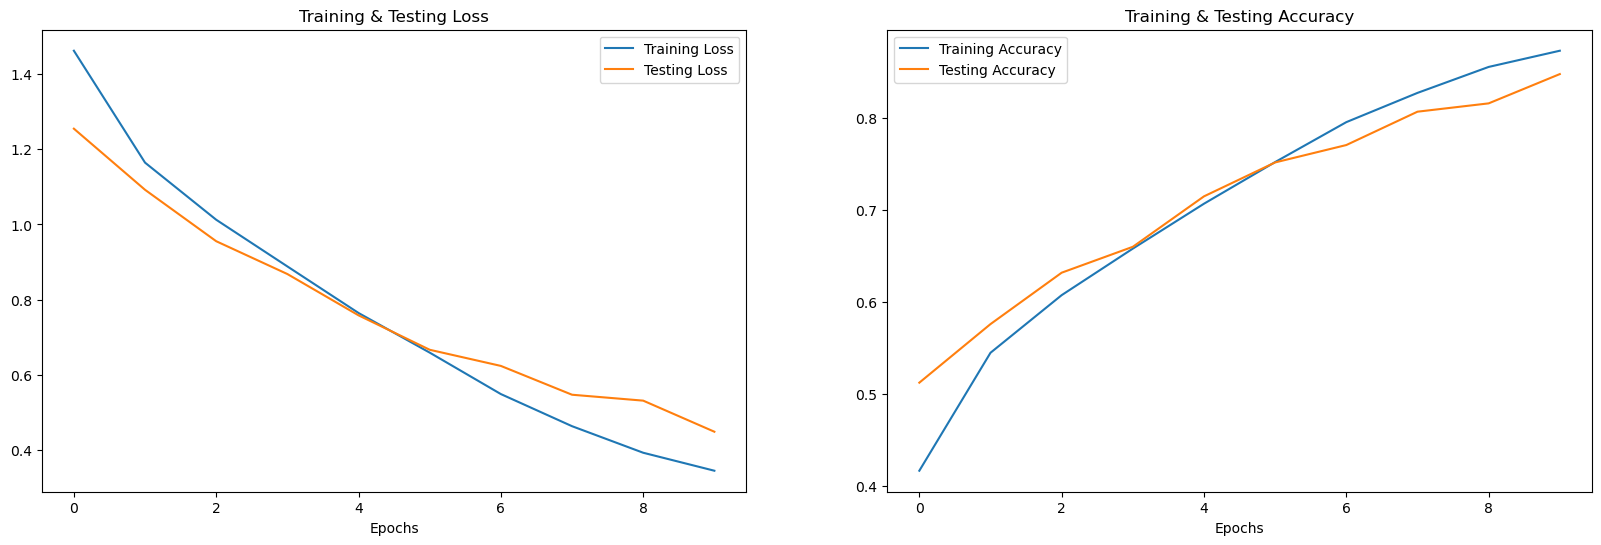

In [20]:
print("Accuracy of our model on test data : " , model.evaluate(x_testcnn,y_test)[1]*100 , "%")

epochs = [i for i in range(10)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [21]:
# predicting on test data.
pred_test0 = model.predict(x_testcnn)
y_pred0 = encoder.inverse_transform(pred_test0)
y_test0 = encoder.inverse_transform(y_test)

# Check for random predictions
df0 = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df0['Predicted Labels'] = y_pred0.flatten()
df0['Actual Labels'] = y_test0.flatten()

df0.head(10)

305/305 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step


,Predicted Labels,Actual Labels
0,neutral,neutral
1,disgust,disgust
2,fear,fear
3,angry,angry
4,happy,fear
5,angry,angry
6,angry,angry
7,fear,fear
8,angry,angry
9,fear,fear


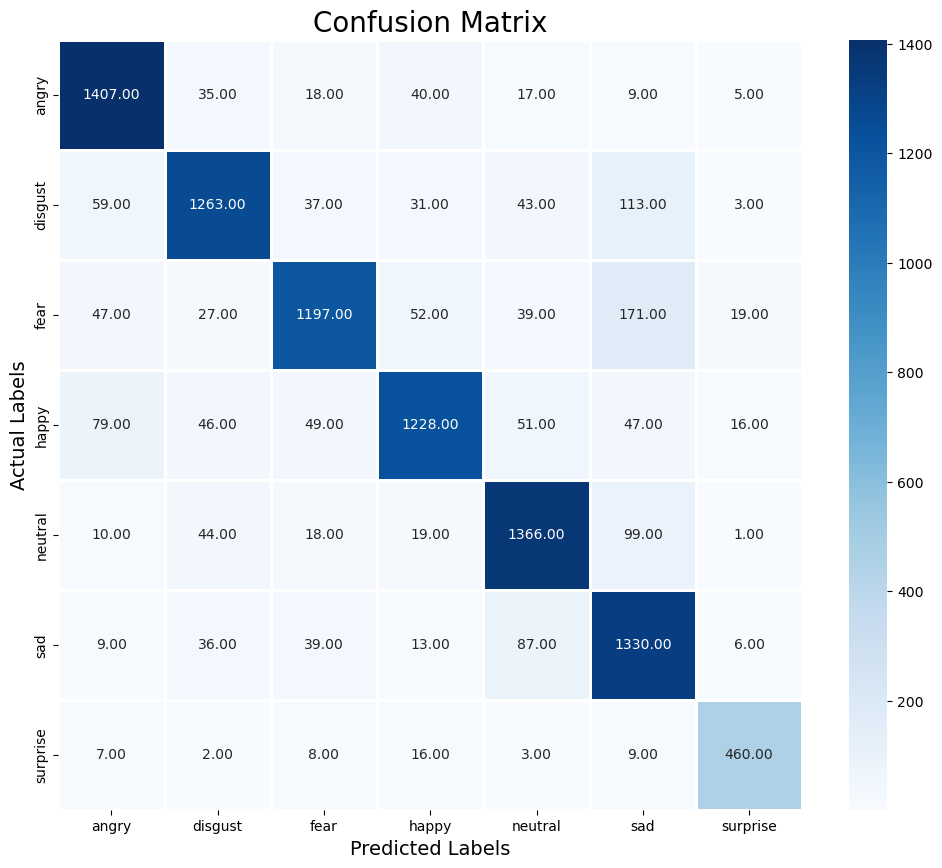

              precision    recall  f1-score   support

       angry       0.87      0.92      0.89      1531
     disgust       0.87      0.82      0.84      1549
        fear       0.88      0.77      0.82      1552
       happy       0.88      0.81      0.84      1516
     neutral       0.85      0.88      0.86      1557
         sad       0.75      0.88      0.81      1520
    surprise       0.90      0.91      0.91       505

    accuracy                           0.85      9730
   macro avg       0.86      0.85      0.85      9730
weighted avg       0.85      0.85      0.85      9730



In [22]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test0, y_pred0)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
#cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='.2f')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()
print(classification_report(y_test0, y_pred0))